## Analysis of B-value correlations with Nea. ancestry in EMH and present-day humans

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

Load the EMH and present-day data from the Ice Age Paper:

In [61]:
data = pd.read_table('../clean_data/ice_age.tsv')

Samples to ignore:

In [62]:
ignore_samples = ['Chimp', 'Denisova', 'Href', 'Kostenki14_SG', 'I0908_published', 'Oase1_pu_own']

In [63]:
data = data[data.columns[~data.columns.isin(ignore_samples)]]

Calculate the number of SNPs available from each sample:

In [67]:
snp_counts = (data.ix[:, data.columns[4:-1]] != 9).sum()
snp_counts

AfontovaGora3      96274
Altai             783974
B_Australian_4    782545
Continenza          1734
B_Dai_4           782292
B_Dinka_3         781797
Dolni13            35999
Dolni15             5857
Dolni16           268246
Dolni43            38765
ElMiron           250151
B_French_3        782613
aurig             151409
B_Han_3           782391
KO1               439528
I0061             582602
B_Karitiana_3     782264
Kostenki12         13387
Kostenki14        632941
LaBrana1          642425
Loschbour         774362
MA1               437324
B_Mandenka_3      782546
B_Mbuti_4         783974
MezE               70754
Motala12          655873
Muierii            22194
Oase1_d            59874
Ostuni1            88493
Ostuni2             2746
B_Papuan_15       782342
Pavlov1             9331
B_Sardinian_3     782575
Stuttgart         768034
Ust_Ishim         778997
Villabruna        425288
Vi_merge          342372
B_Yoruba_3        783974
Bichon            769643
KK1               779372


Filter out samples with less than 50,000 sites available:

In [71]:
ignore_samples = list(snp_counts.index[snp_counts < 50000])
ignore_samples

['Continenza',
 'Dolni13',
 'Dolni15',
 'Dolni43',
 'Kostenki12',
 'Muierii',
 'Ostuni2',
 'Pavlov1']

In [72]:
data = data[data.columns[~data.columns.isin(ignore_samples)]]

Remaining samples:

In [73]:
SAMPLES = data.columns[4:-1]

Split the sites into equal-sized bins based on their B-value:

In [75]:
n_bins = 20
bin_labels = list(range(n_bins))
data['bin'] = pd.qcut(data.bvalue, n_bins, labels=bin_labels).astype(int)

In [76]:
def shared_with_altai(sample_name, df):
    both_have_data = df.query('(Altai != 9) & ({} != 9)'.format(sample_name))
    return (both_have_data.Altai == both_have_data[sample_name]).mean()


NEA_RATE = shared_with_altai('Vi_merge', data)
AFR_RATE = shared_with_altai('B_Dinka_3', data)


def prop_nea(x, samples=SAMPLES):
    altai_like = pd.Series([shared_with_altai(s, x) for s in samples],
                           index=samples)
    return (altai_like - AFR_RATE) / (NEA_RATE - AFR_RATE)

In [77]:
nea_in_bins = data.groupby('bin')[SAMPLES].apply(prop_nea)

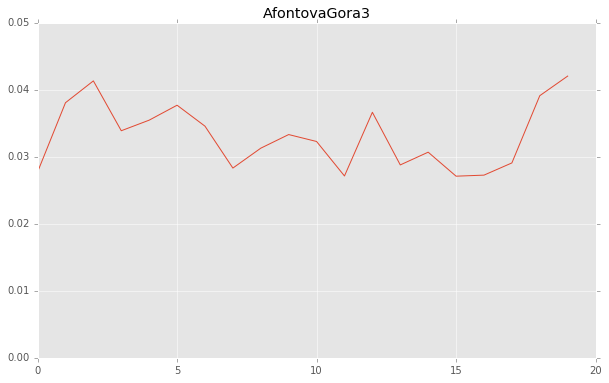

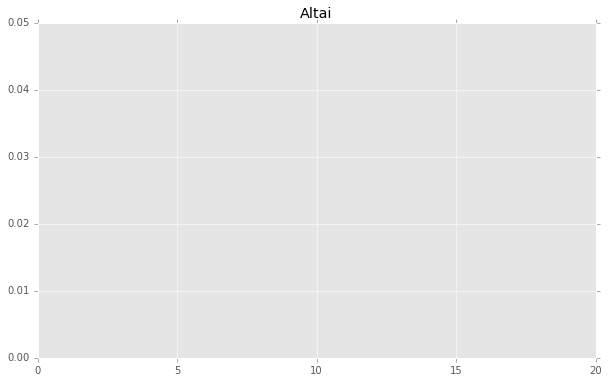

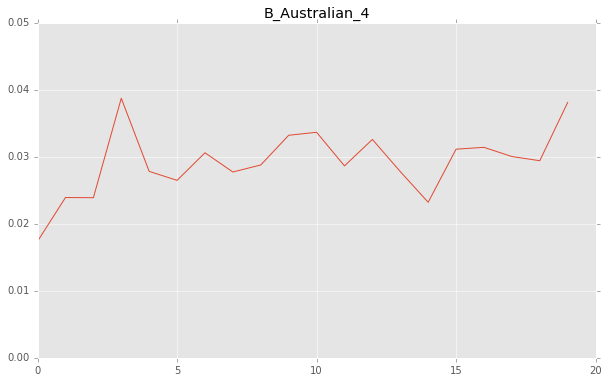

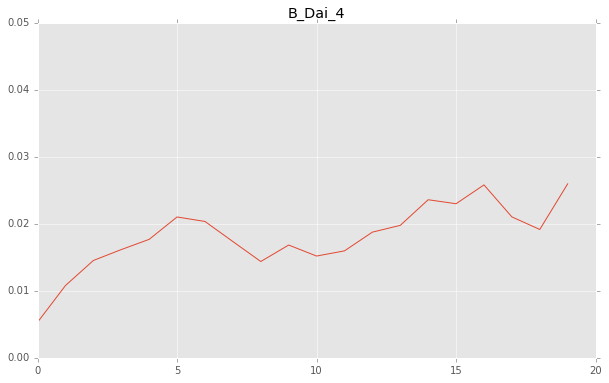

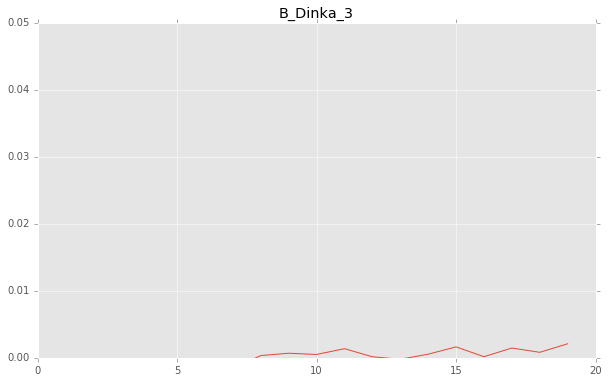

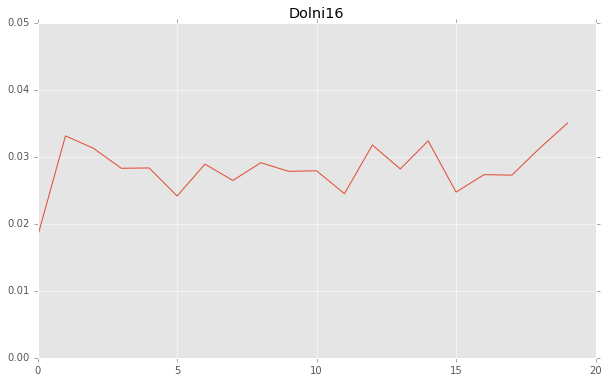

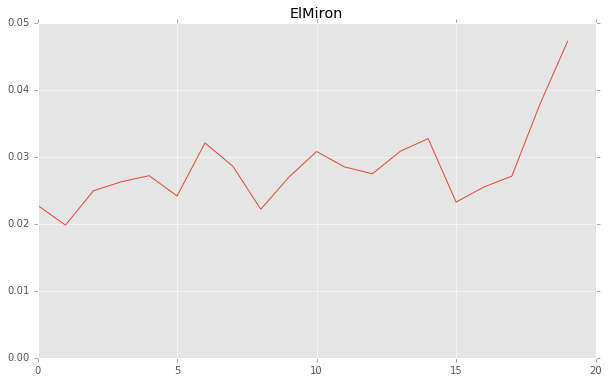

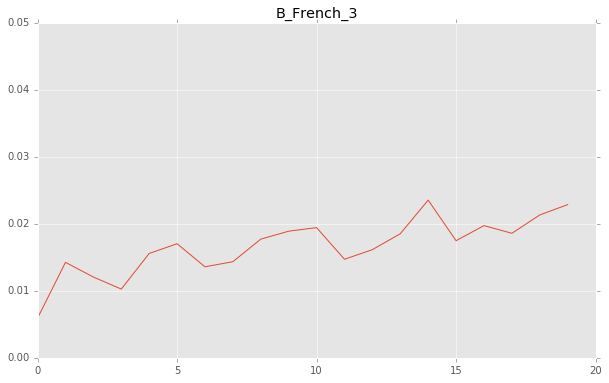

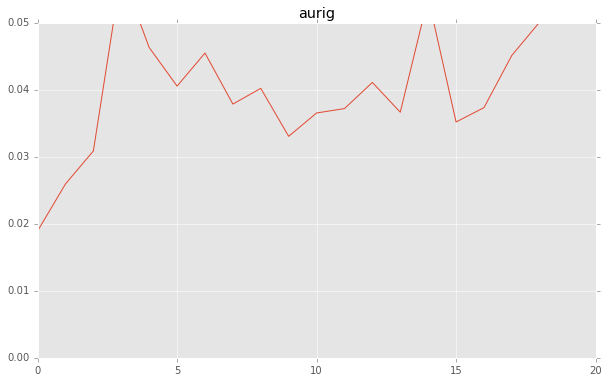

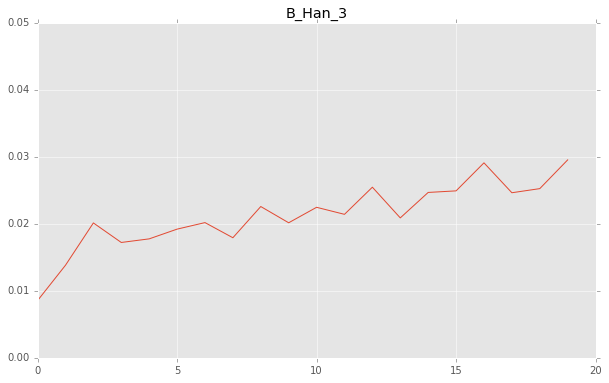

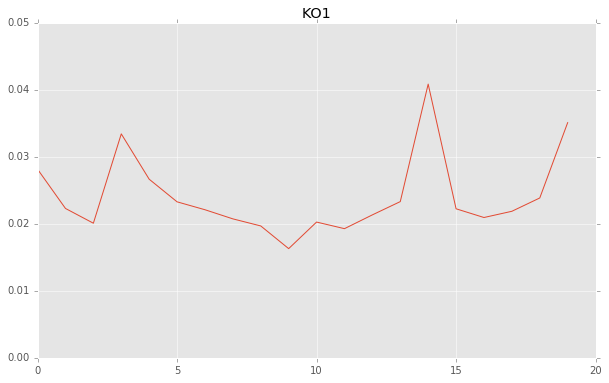

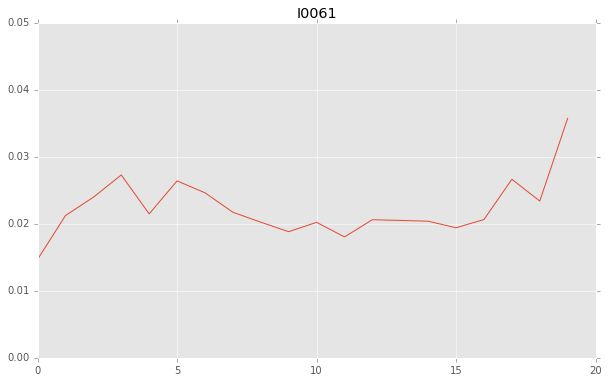

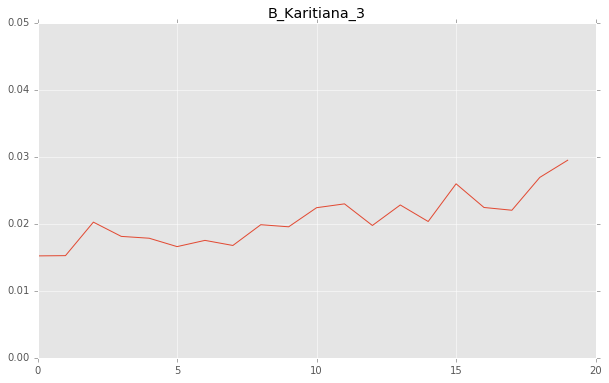

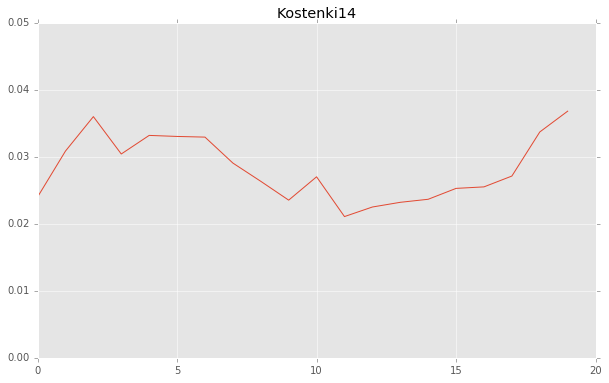

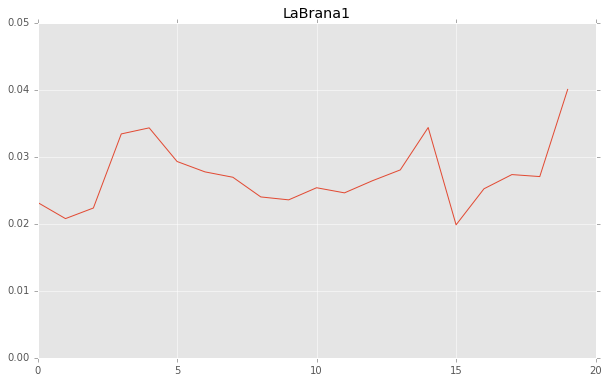

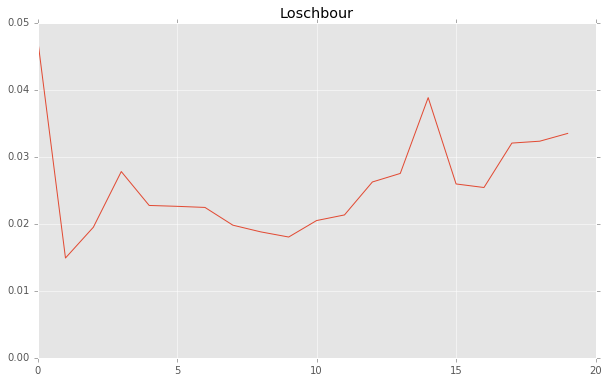

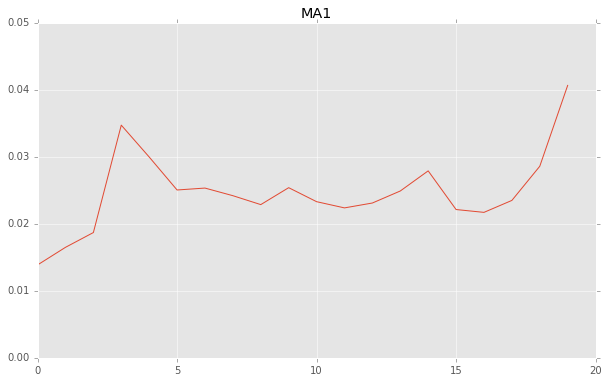

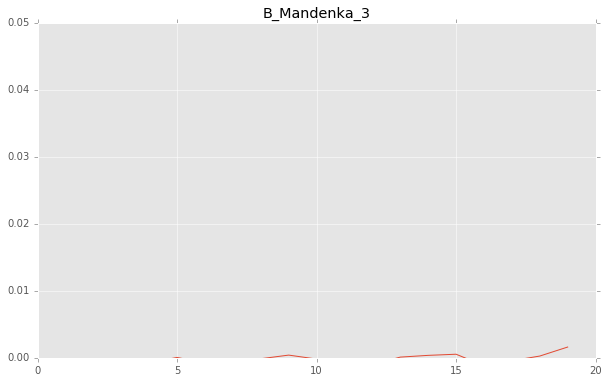

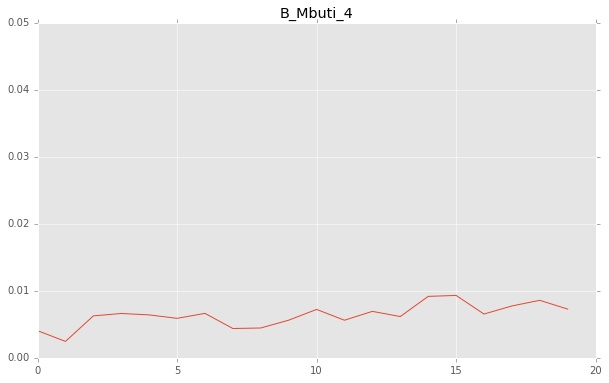

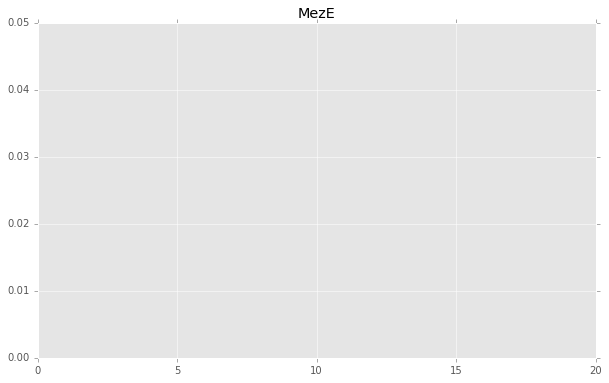

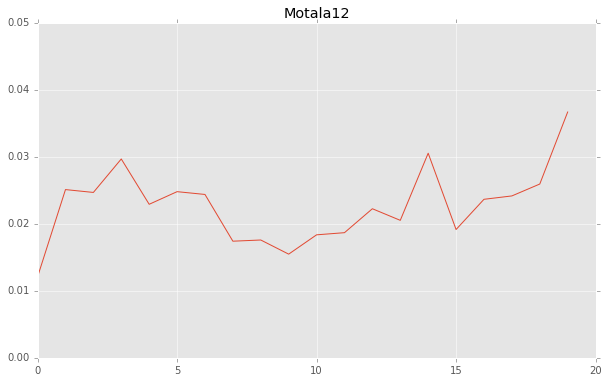

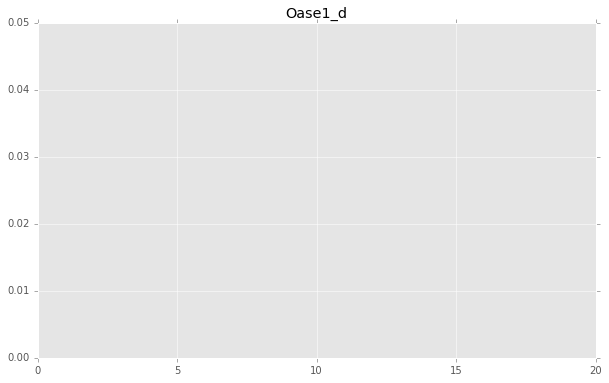

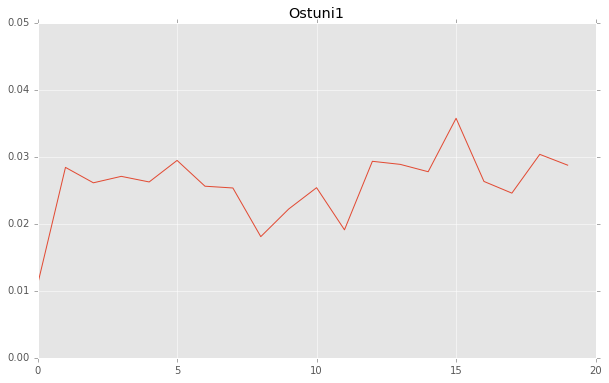

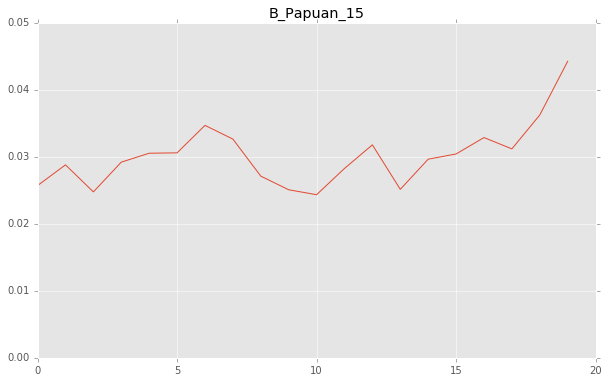

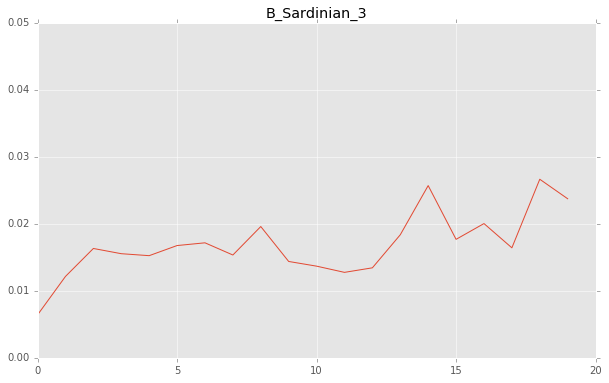

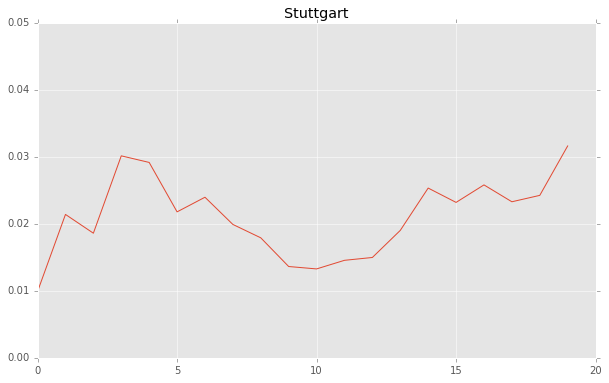

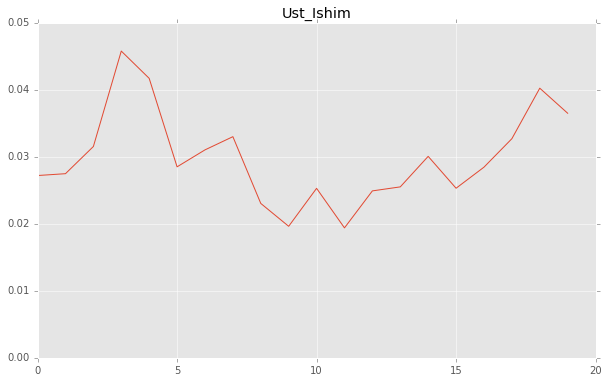

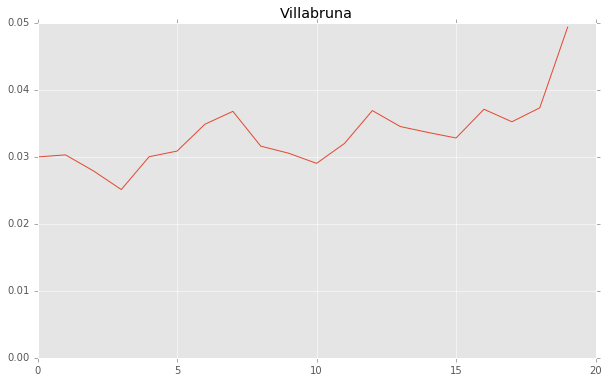

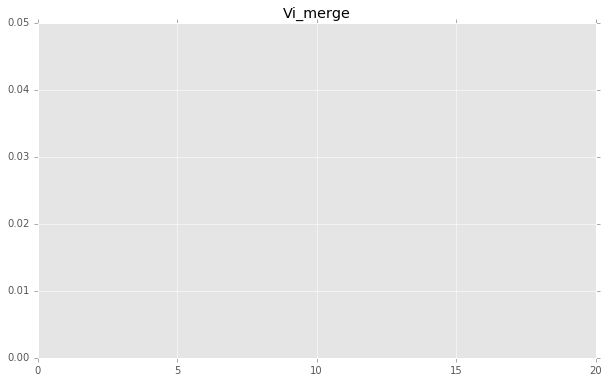

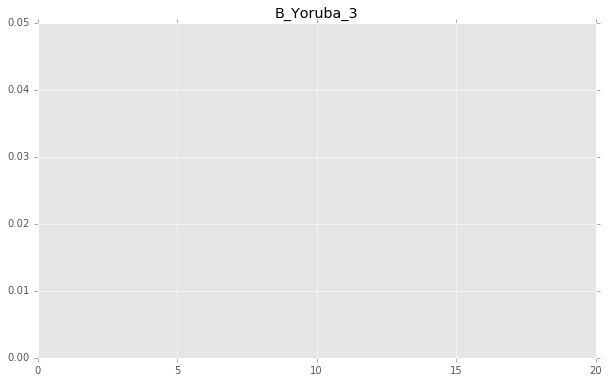

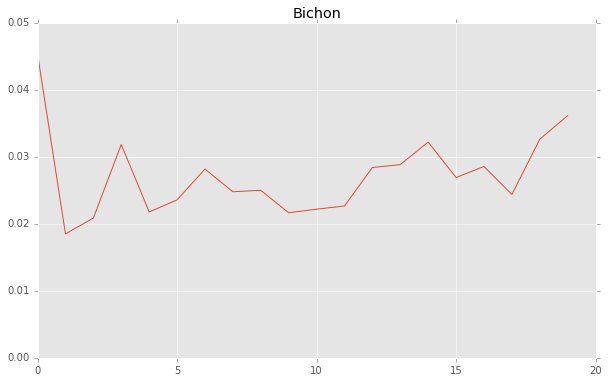

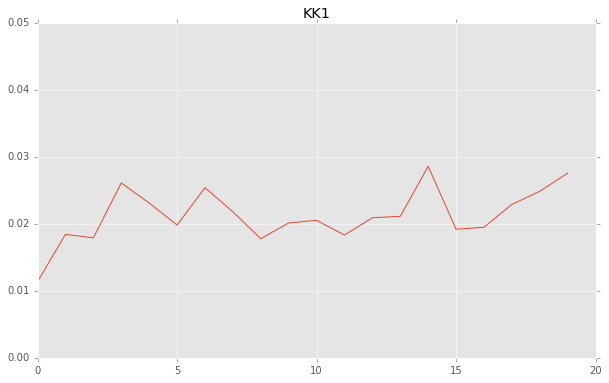

In [78]:
for s in SAMPLES:
    plt.plot(s, data=nea_in_bins)
    plt.title(s)
    plt.ylim(0, 0.05)
    plt.show()